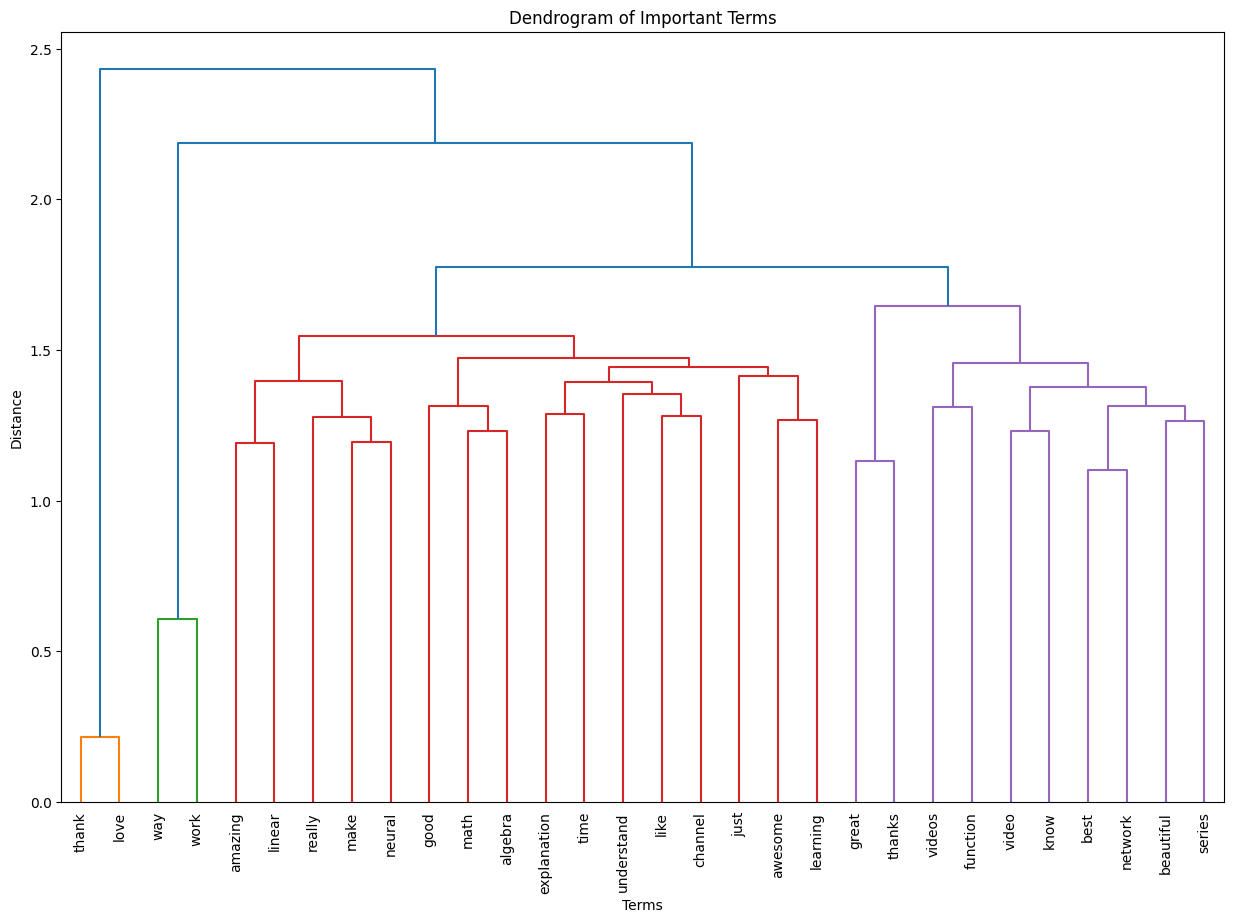

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Load the CSV file (replace with your own file path)
df = pd.read_excel(r"fds dst.xlsx",usecols = "A:E")

# Ensure 'Review' column is string type
df['Comments'] = df['Comments'].astype(str)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to your review data and transform it into a matrix
X = vectorizer.fit_transform(df['Comments'])

# Get feature names (terms)
terms = vectorizer.get_feature_names_out()

# Calculate TF-IDF scores
tfidf_scores = np.sum(X.toarray(), axis=0)

# Set the threshold and filter terms
threshold = 0.01
important_terms = [(term, score) for term, score in zip(terms, tfidf_scores) if score >= threshold]

# Sort the important terms by score and select top 30 terms
important_terms_sorted = sorted(important_terms, key=lambda x: x[1], reverse=True)[:30]

# Extract the top terms and their scores
top_terms, top_scores = zip(*important_terms_sorted)

# Create a new TF-IDF matrix with the important terms
important_X = X[:, np.where(tfidf_scores >= threshold)[0]][:, np.isin(terms, top_terms)]

# Calculate cosine similarity between the important terms
similarity = cosine_similarity(important_X.T)

# Create a linkage matrix for hierarchical clustering
linkage_matrix = linkage(similarity, method='ward')

# Create a dendrogram with the important terms
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=top_terms, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram of Important Terms')
plt.xlabel('Terms')
plt.ylabel('Distance')
plt.show()

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Load CSV file
def text_analysis(text):
    # Convert text to lowercase
    text = text.lower()

    # Count stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    num_stopwords = sum(1 for word in word_tokens if word in stop_words)

    # Count punctuations
    num_punctuations = len(re.findall(r'[^\w\s]', text))

    # Count digits
    num_digits = len(re.findall(r'\d', text))

    # Count special symbols
    num_special_symbols = len(re.findall(r'[_\W]+', text))

    return num_stopwords, num_punctuations, num_digits, num_special_symbols

df = pd.read_excel(r"fds dst.xlsx",usecols = "A:E")

# Apply text analysis function to Comment column
df[['num_stopwords', 'num_punctuations', 'num_digits', 'num_special_symbols']] = df['Comments'].apply(lambda x: pd.Series(text_analysis(x)))

# Save analysis results to new CSV file
df[['num_stopwords', 'num_punctuations', 'num_digits', 'num_special_symbols']].to_excel('/content/fds_analysis.xlsx', index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
# Load your dataset
df = pd.read_excel(r"fds dst.xlsx",usecols = "A:E")
# Basic EDA
print("Dataset Head:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())
# Add comment length and word count
df['comment_length'] = df['Comments'].apply(len)
df['word_count'] = df['Comments'].apply(lambda x: len(x.split()))
# Interactive scatter plot for comment length vs word count
# Change 'label' to 'Label' in the color argument
fig = px.scatter(df, x='comment_length', y='word_count', color='Label',  # Corrected to 'Label'
                 title='Comment Length vs Word Count',
                 labels={'comment_length': 'Comment Length', 'word_count': 'Word Count'},
                 hover_data=['Comments'])
fig.show()
# Interactive histogram for comment lengths
fig_length = px.histogram(df, x='comment_length', nbins=30,
                          color='Label',  # Corrected to 'Label' if needed
                          title='Distribution of Comment Lengths',
                          labels={'comment_length': 'Comment Length'})
fig_length.show()
# Interactive histogram for word counts
fig_word_count = px.histogram(df, x='word_count', nbins=30,
                              color='Label',  # Corrected to 'Label' if needed
                              title='Distribution of Word Counts',
                              labels={'word_count': 'Word Count'})
fig_word_count.show()
# N-gram analysis function
def get_ngrams(comments, n=2, top_n=20): # Change top_n to 20
    vectorizer = CountVectorizer(ngram_range=(n, n),
                                 stop_words='english')
    ngrams = vectorizer.fit_transform(comments)
    ngram_counts = ngrams.sum(axis=0)
    ngram_features = vectorizer.get_feature_names_out()

    # Create a DataFrame of n-grams and their counts
    ngram_df = pd.DataFrame(ngram_counts.A1, index=ngram_features,
                            columns=['count'])
    return ngram_df.sort_values(by='count',
                                ascending=False).head(top_n)
# Generate and display bigrams
comments = df['Comments'].dropna()
bigrams = get_ngrams(comments, n=2, top_n=20) # Get top 20 bigrams
print("\nTop 20 Bigrams:")
print(bigrams)
# Bar plot for bigrams
fig_bigrams = px.bar(bigrams, x=bigrams.index, y='count',
                     title='Top 20 Bigrams',
                     labels={'x': 'Bigrams', 'count': 'Count'})
fig_bigrams.show()
# Generate and display trigrams
trigrams = get_ngrams(comments, n=3, top_n=20) # Get top 20 trigrams
print("\nTop 20 Trigrams:")
print(trigrams)
# Bar plot for trigrams
fig_trigrams = px.bar(trigrams, x=trigrams.index, y='count',
                      title='Top 20 Trigrams',
                      labels={'x': 'Trigrams', 'count': 'Count'})
fig_trigrams.show()

Dataset Head:
   1 Platform                                           Comments  Label
0  2  Youtube  He truly is very good at what he does   You ca...     -1
1  3  Youtube  Being brilliant at maths is one thing. Being b...     -1
2  4  Youtube  You honestly bring me near to tears because I ...     -1
3  5  Youtube  All these years of doing math and I never saw ...     -1
4  6  Youtube  Those graphics are really getting exceptionall...     -1

Missing Values:
1           0
Platform    0
Comments    0
Label       0
dtype: int64



Top 20 Bigrams:
                      count
linear algebra          176
cost function           127
neural network           99
neural networks          64
great video              54
ve seen                  44
machine learning         38
fourier series           37
amazing video            36
gradient descent         36
thanks lot               33
feel like                31
don understand           30
deep learning            29
don know                 29
great work               28
love videos              28
local minimum            28
prime numbers            27
linearly independent     27



Top 20 Trigrams:
                              count
linear algebra course            18
linearly independent vectors     11
linear algebra class              9
minimum cost function             9
linear algebra thank              9
linear algebra videos             8
basis vector space                7
understanding linear algebra      7
just want say                     7
doing great job                   6
understand linear algebra         6
videos ve seen                    6
vectors linearly independent      6
set weights biases                6
new resulting vectors             5
thank making videos               5
biological neurons binary         5
minimize cost function            5
essence linear algebra            5
video ve seen                     5
